In [94]:
from random import random
from numba import njit, prange

# normal way:
def Y(t): return 1 + (Y(random()*t) if random()<t else 0)
def y(t,nsim): return sum(Y(t) for _ in range(nsim))/nsim

# numba way:
@njit(fastmath=True)
def Yn(t,T): return 1.0 + (T*Yn(random()*t,T) if random()<t/T else 0.0)

@njit(fastmath=True, parallel=True)
def yn(t, nsim):
    total = 0.0 # <- typing becomes important 0 vs 0.0
    for _ in prange(nsim): # numba likes explicit loops sometimes even over vectorized numpy
        total += Yn(t,t)
    return total/nsim

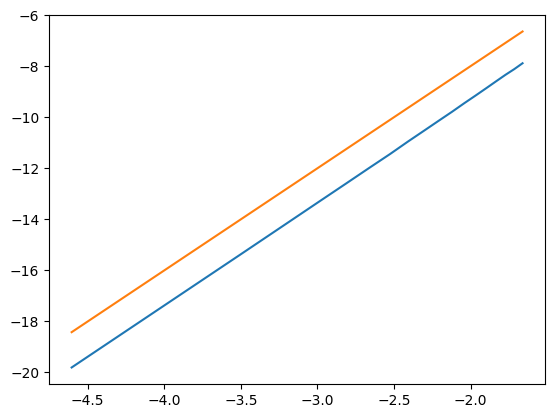

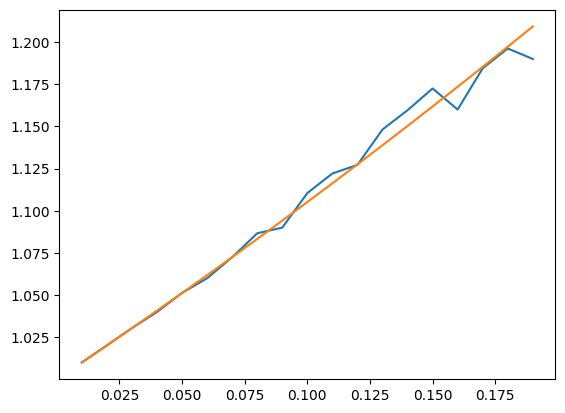

In [109]:
import matplotlib.pyplot as plt
import numpy as np

tt = np.arange(0.01,0.2,0.01)
yy = [np.var([Yn(t,t) for _ in range(1000)]) for t in tt]

plt.plot(np.log(tt),np.log(yy))
plt.plot(np.log(tt),4*np.log(tt))
plt.show()

yy = [yn(t,2) for t in tt]

plt.plot(tt,yy)
plt.plot(tt,np.exp(tt))
plt.show()